In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train_sample.csv')

df.drop(columns=['key'], inplace=True)
df = df[
    (df['pickup_longitude'].between(-78,-70)) & 
    (df['dropoff_longitude'].between(-78,-70)) & 
    (df['pickup_latitude'].between(37,45)) & 
    (df['dropoff_latitude'].between(37,45))
]
df = df[df['passenger_count'].between(1,10)]
df = df[df['fare_amount'] >= 2.5]
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [3]:
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_time'] = df['pickup_datetime'].apply(lambda x: x.hour + x.minute/60)

df['pickup_weekend'] = df['pickup_weekday'].apply(lambda x: 0 if x<5 else 1)

Turn month, weekday and time into cyclic features.

In [29]:
np.sin((df['pickup_month']-1) * (2.0*np.pi/12)).value_counts()

 8.660254e-01    10188
 8.660254e-01    10122
 1.000000e+00     9985
 5.000000e-01     9643
 0.000000e+00     9622
 5.000000e-01     9158
-1.000000e+00     8830
-5.000000e-01     8365
 1.224647e-16     8219
-8.660254e-01     8205
-8.660254e-01     8198
-5.000000e-01     7573
Name: pickup_month, dtype: int64

In [4]:
df['pickup_month_sin'] = np.sin((df['pickup_month']-1) * (2.0*np.pi/12))
df['pickup_month_cos'] = np.cos((df['pickup_month']-1) * (2.0*np.pi/12))
df['pickup_weekday_sin'] = np.sin((df['pickup_weekday']) * (2.0*np.pi/7))
df['pickup_weekday_cos'] = np.cos((df['pickup_weekday']) * (2.0*np.pi/7))
df['pickup_time_sin'] = np.sin((df['pickup_time']) * (2.0*np.pi/24))
df['pickup_time_cos'] = np.cos((df['pickup_time']) * (2.0*np.pi/24))

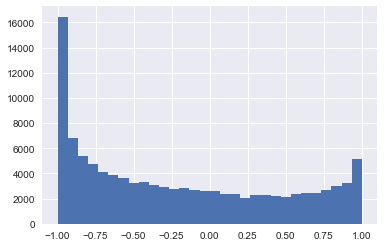

In [39]:
df['pickup_time_sin'].hist(bins=30)

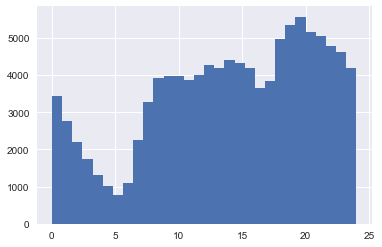

In [40]:
df['pickup_time'].hist(bins=30)

In [5]:
df.drop(columns=['pickup_time','pickup_month','pickup_weekday'], inplace=True)

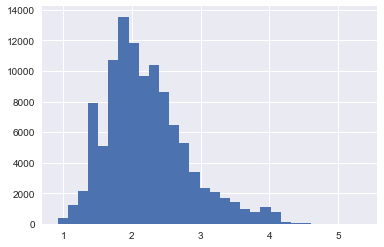

In [46]:
np.log(df['fare_amount']).hist(bins=30)

In [6]:
# https://stackoverflow.com/a/29546836
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    
    return km

In [7]:
df['distance'] = haversine_np(df['pickup_longitude'],df['pickup_latitude'],df['dropoff_longitude'],df['dropoff_latitude'])

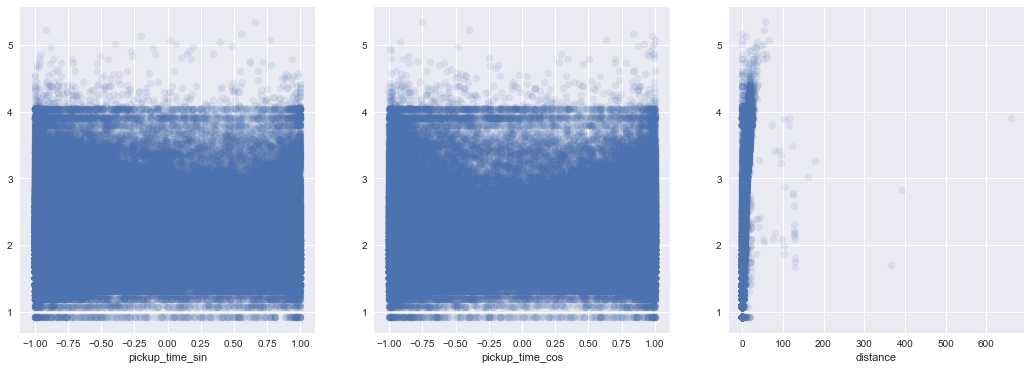

In [8]:
temp_list = ['pickup_time_sin','pickup_time_cos','distance']

fig = plt.figure(figsize=(18,6))

for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    plt.scatter(df[temp_list[i]], np.log(df['fare_amount']), alpha=0.1)
    ax.set_xlabel(temp_list[i])

pickup_time sin and cos might have some non-linear relationship.  
distance should be examined more carefully.

In [15]:
df[df['distance']>100]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_weekend,pickup_month_sin,pickup_month_cos,pickup_weekday_sin,pickup_weekday_cos,pickup_time_sin,pickup_time_cos,distance
4901,20.50,2015-05-08 13:51:46,-72.063202,40.834679,-73.982452,40.772621,2,2015,0,0.866025,-5.000000e-01,-0.433884,-0.900969,-0.465615,-0.884988,161.584678
11827,8.90,2011-05-02 17:22:39,-73.968700,40.764603,-73.983363,39.603841,1,2011,0,0.866025,-5.000000e-01,0.000000,1.000000,-0.986286,-0.165048,128.995817
12375,16.10,2011-03-12 11:04:48,-73.973343,40.748423,-73.966213,39.628327,1,2011,1,0.866025,5.000000e-01,-0.974928,-0.222521,0.241922,-0.970296,124.472283
13480,6.50,2010-05-22 20:39:10,-73.995847,40.716745,-73.137393,41.366138,2,2010,1,0.866025,-5.000000e-01,-0.974928,-0.222521,-0.768842,0.639439,101.903503
13755,26.10,2011-03-23 16:51:42,-73.958324,39.605994,-75.417121,40.770326,1,2011,0,0.866025,5.000000e-01,0.974928,-0.222521,-0.955020,-0.296542,179.095371
14185,7.30,2009-11-08 14:44:15,-73.137393,41.366138,-74.003499,40.727274,1,2009,1,-0.866025,5.000000e-01,-0.781831,0.623490,-0.656059,-0.754710,101.531693
16313,9.30,2011-02-05 15:28:15,-73.970358,40.762110,-73.968250,39.611070,2,2011,1,0.500000,8.660254e-01,-0.974928,-0.222521,-0.788011,-0.615661,127.909522
24278,5.50,2012-11-17 19:34:00,-73.981927,37.466667,-73.966565,40.767227,1,2012,1,-0.866025,5.000000e-01,-0.974928,-0.222521,-0.917060,0.398749,366.777494
27782,8.90,2011-02-08 17:40:54,-73.963583,39.632955,-73.982013,40.778344,1,2011,0,0.500000,8.660254e-01,0.781831,0.623490,-0.996195,-0.087156,127.291091
30246,49.15,2009-02-04 16:16:19,-73.137393,41.366138,-74.010771,40.706646,1,2009,0,0.500000,8.660254e-01,0.974928,-0.222521,-0.898794,-0.438371,103.585357


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


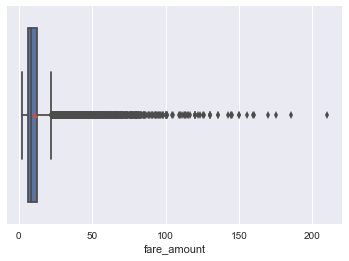

In [14]:
sns.boxplot(df['fare_amount'], showmeans=True)

In [16]:
df[df['fare_amount']>150]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_weekend,pickup_month_sin,pickup_month_cos,pickup_weekday_sin,pickup_weekday_cos,pickup_time_sin,pickup_time_cos,distance
16926,155.54,2015-04-26 10:26:48,-73.881332,40.769432,-73.619469,41.029087,1,2015,1,1.000000,6.123234e-17,-0.781831,0.623490,0.398749,-0.917060,36.281604
23081,159.75,2015-06-01 00:04:50,-73.994415,40.750603,-73.420250,41.137344,1,2015,0,0.500000,-8.660254e-01,0.000000,1.000000,0.017452,0.999848,64.573015
43221,209.75,2013-10-17 09:16:47,-73.982745,40.750214,-74.638455,40.634324,2,2013,0,-1.000000,-1.836970e-16,0.433884,-0.900969,0.656059,-0.754710,56.729454
43503,170.00,2010-09-06 23:14:00,-73.862823,40.769073,-73.983105,40.755175,1,2010,0,-0.866025,-5.000000e-01,0.000000,1.000000,-0.199368,0.979925,10.241155
57924,185.08,2015-02-04 16:26:15,-73.781845,40.644760,-74.413162,40.740791,1,2015,0,0.500000,8.660254e-01,0.974928,-0.222521,-0.917060,-0.398749,54.252583
88492,175.00,2014-05-17 02:14:00,-73.991115,40.751200,-73.990973,40.751222,1,2014,1,0.866025,-5.000000e-01,-0.974928,-0.222521,0.551937,0.833886,0.012201
89504,160.00,2009-11-28 03:23:00,-73.440637,40.735258,-73.440633,40.735260,1,2009,1,-0.866025,5.000000e-01,-0.974928,-0.222521,0.774393,0.632705,0.000404


In [ ]:
temp_list = ['pickup_month_sin','pickup_month_cos','pickup_weekday_sin','pickup_weekday_cos','pickup_weekend']
